## **DataFrames**

In [69]:
import pandas as pd
import numpy as np

DataFrame is a 2-dimensional labeled data structure with columns of potentially different types.

data can be many different things:
* Dict of 1D ndarrays, lists, dicts, or Series
* 2-D numpy.ndarray
* Structured or record ndarray
* A Series
* Another DataFrame

## From dict of Series or dicts

In [70]:
d = {'one' : pd.Series([1., 2., 3., 5.], index=['a', 'b', 'c', 'e']),
     'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
d

{'one': a    1.0
 b    2.0
 c    3.0
 e    5.0
 dtype: float64, 'two': a    1.0
 b    2.0
 c    3.0
 d    4.0
 dtype: float64}

In [71]:
d['two']

a    1.0
b    2.0
c    3.0
d    4.0
dtype: float64

In [72]:
df = pd.DataFrame(d)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0
e,5.0,NaN


In [73]:
pd.DataFrame(d, index=['d', 'b', 'a'])

,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


In [74]:
pd.DataFrame(d['one'], index=['d', 'b', 'a'])

,0
d,NaN
b,2.0
a,1.0


In [75]:
pd.DataFrame(d, index=['d', 'b', 'a'], columns=['two', 'three'])

,two,three
d,4.0,NaN
b,2.0,NaN
a,1.0,NaN


In [76]:
pd.DataFrame(d, index=['d', 'b', 'a'], columns=['two', 'one', 'three'])

,two,one,three
d,4.0,NaN,NaN
b,2.0,2.0,NaN
a,1.0,1.0,NaN


In [77]:
df.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [78]:
df.columns

Index(['one', 'two'], dtype='object')

## From dict of ndarrays / lists

In [79]:
d = {'one' : [1., 2., 3., 4.],
     'two' : [4., 3., 2., 1.]}
d

{'one': [1.0, 2.0, 3.0, 4.0], 'two': [4.0, 3.0, 2.0, 1.0]}

In [80]:
pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [81]:
df = pd.DataFrame(d, index=['a', 'b', 'c', 'd'])
df

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


In [82]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

## From structured or record array

In [95]:
data = np.zeros((2,), dtype=[('A', 'i4'),('B', 'f4'),('C', 'a10')])
data

array([(0, 0., b''), (0, 0., b'')],
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [96]:
pd.DataFrame(data)

,A,B,C
0,0,0.0,b''
1,0,0.0,b''


In [97]:
data[:] = [(1,2.,'Hello'), (2,3.,"World")]

In [86]:
pd.DataFrame(data)

,A,B,C
0,1,2.0,b'Hello'
1,2,3.0,b'World'


In [98]:
pd.DataFrame(data, index=['first', 'second'])

,A,B,C
first,1,2.0,b'Hello'
second,2,3.0,b'World'


In [99]:
pd.DataFrame(data, columns=['C', 'A', 'B'])

,C,A,B
0,b'Hello',1,2.0
1,b'World',2,3.0


In [100]:
pd.DataFrame(data, columns=['C', 'A', 'B'], index=['first','second'])

,C,A,B
first,b'Hello',1,2.0
second,b'World',2,3.0


In [101]:
pd.DataFrame(data, columns=['C', 'A', 'B'], index=['second','first'])

,C,A,B
second,b'Hello',1,2.0
first,b'World',2,3.0


## From a list of dicts

In [102]:
data2 = [{'a': 1, 'b': 2}, {'a': 5, 'b': 10, 'c': 20}]

In [103]:
pd.DataFrame(data2)

,a,b,c
0,1,2,NaN
1,5,10,20.0


In [104]:
pd.DataFrame(data2, index=['first', 'second'])

,a,b,c
first,1,2,NaN
second,5,10,20.0


In [105]:
pd.DataFrame(data2, columns=['a', 'b'])

,a,b
0,1,2
1,5,10


## From a dict of tuples

In [108]:
pd.DataFrame({('a', 'b'): {('A', 'B'): 1, ('A', 'C'): 2},
   ('a', 'a'): {('A', 'C'): 3, ('A', 'B'): 4},
   ('a', 'c'): {('A', 'B'): 5, ('A', 'C'): 6},
   ('b', 'a'): {('A', 'C'): 7, ('A', 'B'): 8},
   ('b', 'b'): {('A', 'D'): 9, ('A', 'B'): 10}})

a              b      
       b    a    c    a     b
A B  1.0  4.0  5.0  8.0  10.0
  C  2.0  3.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

## DataFrame.from_dict

In [120]:
pd.DataFrame.from_dict(dict([('A', [1, 2, 3]), ('B', [4, 5, 6])]))

,A,B
0,1,4
1,2,5
2,3,6


In [135]:
foo_df = pd.DataFrame.from_dict(dict([('A', [1, 2, 3]), ('B', [4, 5, 6])]))
foo_df.set_index(['A','B'])

,
A,B
1,4
2,5
3,6


In [151]:
bar_df = pd.DataFrame(foo_df)
bar_df

,A,B
0,1,4
1,2,5
2,3,6


**_If you pass orient='index', the keys will be the row labels_**

In [118]:
pd.DataFrame.from_dict(dict([('A', [1, 2, 3]), ('B', [4, 5, 6])]),
                       orient='index', columns=['one', 'two','three'])

,one,two,three
A,1,2,3
B,4,5,6


# Column selection, addition, deletion

In [252]:
series_dict = {'one' : pd.Series([1., 2., 3., 5.], index=['a', 'b', 'c', 'e']),
               'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
df = pd.DataFrame(series_dict)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0
e,5.0,NaN


In [253]:
df['one']

a    1.0
b    2.0
c    3.0
d    NaN
e    5.0
Name: one, dtype: float64

## Column addition

In [254]:
df['three'] = df['one'] * df['two']
df

,one,two,three
a,1.0,1.0,1.0
b,2.0,2.0,4.0
c,3.0,3.0,9.0
d,NaN,4.0,NaN
e,5.0,NaN,NaN


In [255]:
df['flag'] = df['one'] > 2
df

,one,two,three,flag
a,1.0,1.0,1.0,False
b,2.0,2.0,4.0,False
c,3.0,3.0,9.0,True
d,NaN,4.0,NaN,False
e,5.0,NaN,NaN,True


## Column deletion

In [256]:
del df['two']
df

,one,three,flag
a,1.0,1.0,False
b,2.0,4.0,False
c,3.0,9.0,True
d,NaN,NaN,False
e,5.0,NaN,True


In [257]:
three = df.pop('three')
three

a    1.0
b    4.0
c    9.0
d    NaN
e    NaN
Name: three, dtype: float64

In [258]:
df

,one,flag
a,1.0,False
b,2.0,False
c,3.0,True
d,NaN,False
e,5.0,True


## Columns insertion

In [259]:
df['foo'] = 'bar'
df

,one,flag,foo
a,1.0,False,bar
b,2.0,False,bar
c,3.0,True,bar
d,NaN,False,bar
e,5.0,True,bar


In [260]:
df["one"][4:]

e    5.0
Name: one, dtype: float64

In [261]:
df['one_trunc'] = df["one"][4:]
df

,one,flag,foo,one_trunc
a,1.0,False,bar,NaN
b,2.0,False,bar,NaN
c,3.0,True,bar,NaN
d,NaN,False,bar,NaN
e,5.0,True,bar,5.0


In [262]:
df.insert(4, 'one_clone', df['one'])

In [263]:
df

,one,flag,foo,one_trunc,one_clone
a,1.0,False,bar,NaN,1.0
b,2.0,False,bar,NaN,2.0
c,3.0,True,bar,NaN,3.0
d,NaN,False,bar,NaN,NaN
e,5.0,True,bar,5.0,5.0


# Assigning New Columns in Method Chains

In [339]:
iris = pd.read_csv('data/iris.data')
iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**_assign always returns a copy of the data, leaving the original DataFrame untouched_**

In [340]:
iris.assign(sepal_ratio = iris['SepalWidth'] / iris['SepalLength'])

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,sepal_ratio
0,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


In [341]:
iris.assign(sepal_ratio_lambda = lambda x: (x['SepalWidth'] /  x['SepalLength'])).head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,sepal_ratio_lambda
0,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


In [342]:
iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [347]:
iris = iris.assign(SepalRatio = lambda x: x.SepalWidth / x.SepalLength)
iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,SepalRatio
0,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


In [353]:
iris = iris.assign(PetalRatio = lambda x: x.PetalWidth / x.PetalLength)
iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,SepalRatio,PetalRatio
0,5.1,3.5,1.4,0.2,Iris-setosa,0.686275,0.142857
1,4.9,3.0,1.4,0.2,Iris-setosa,0.612245,0.142857
2,4.7,3.2,1.3,0.2,Iris-setosa,0.680851,0.153846
3,4.6,3.1,1.5,0.2,Iris-setosa,0.673913,0.133333
4,5.0,3.6,1.4,0.2,Iris-setosa,0.720000,0.142857


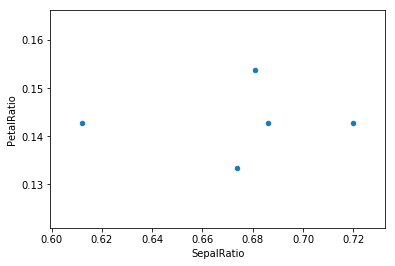

In [364]:
iris.query('SepalLength > 1').plot(kind='scatter', x='SepalRatio', y='PetalRatio')

# Indexing / Selection

In [368]:
df

,one,flag,foo,one_trunc,one_clone
a,1.0,False,bar,NaN,1.0
b,2.0,False,bar,NaN,2.0
c,3.0,True,bar,NaN,3.0
d,NaN,False,bar,NaN,NaN
e,5.0,True,bar,5.0,5.0


## **Select index**

In [380]:
df.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

## **Select column**

In [510]:
df.one

a    1.0
b    2.0
c    3.0
d    NaN
e    5.0
Name: one, dtype: float64

In [369]:
df['one']

a    1.0
b    2.0
c    3.0
d    NaN
e    5.0
Name: one, dtype: float64

## **Select row by label**

In [374]:
df.loc['a']

one              1
flag         False
foo            bar
one_trunc      NaN
one_clone        1
Name: a, dtype: object

## **Select row by integer location**

In [375]:
df.iloc[0]

one              1
flag         False
foo            bar
one_trunc      NaN
one_clone        1
Name: a, dtype: object

## **Slice rows**

In [379]:
df[0:4]

,one,flag,foo,one_trunc,one_clone
a,1.0,False,bar,NaN,1.0
b,2.0,False,bar,NaN,2.0
c,3.0,True,bar,NaN,3.0
d,NaN,False,bar,NaN,NaN


## **Select rows by boolean vector**

In [388]:
df[1:]

,one,flag,foo,one_trunc,one_clone
b,2.0,False,bar,NaN,2.0
c,3.0,True,bar,NaN,3.0
d,NaN,False,bar,NaN,NaN
e,5.0,True,bar,5.0,5.0


In [389]:
df[:1]

,one,flag,foo,one_trunc,one_clone
a,1.0,False,bar,NaN,1.0


## Data alignment and arithmetic

In [391]:
np.random.randn(10, 4)

array([[-0.31158765, -0.18897491, -0.29038974, -0.23036116],
       [-0.15877671, -1.61209162,  1.06064995, -0.12262902],
       [ 0.52064628, -0.15048467,  0.62312395,  0.03703935],
       [ 0.22679488,  0.80010109, -1.09220245,  1.56336423],
       [-1.09126976,  1.01708392,  0.82686295,  1.52641476],
       [-0.51717262, -0.443298  ,  0.20462581,  1.08987633],
       [ 0.69444335, -0.76634494, -1.5220998 ,  0.39516458],
       [-1.07892367, -0.51002539,  0.08241078, -0.20904969],
       [ 0.3181171 , -0.57548849, -0.42343383, -0.41099173],
       [ 1.51423485, -0.94763497,  0.26913492, -0.09942529]])

In [401]:
df1 = pd.DataFrame(np.random.randn(10, 4), columns=['A', 'B', 'C', 'D'])
df1 

,A,B,C,D
0,-0.201556,1.103267,1.018612,-0.032681
1,-0.584644,1.172912,0.813094,0.387255
2,-0.181940,0.456217,-0.419641,0.586115
3,-0.301708,1.026268,-2.125335,-0.400912
4,1.047072,-0.650382,-1.015646,0.300153
5,0.027689,-0.417667,-0.126596,-1.688783
6,0.078616,1.561753,2.388967,0.457309
7,0.098886,-0.825835,2.506676,0.573944
8,-0.621378,0.988223,-0.009367,-1.801408
9,-0.496938,0.411594,-1.398496,1.587489


In [402]:
df2 = pd.DataFrame(np.random.randn(7, 3), columns=['A', 'B', 'C'])
df3 = df1 + df2
df3

,A,B,C,D
0,1.279642,1.385444,-0.382215,NaN
1,-1.387242,1.832699,0.496625,NaN
2,-0.289550,-0.746541,-1.541758,NaN
3,-0.294108,0.501013,-3.075863,NaN
4,2.189331,1.805663,-1.809670,NaN
5,-0.496777,-1.899074,1.876995,NaN
6,2.264638,-1.498909,3.832002,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [403]:
df1.iloc[0]

A   -0.201556
B    1.103267
C    1.018612
D   -0.032681
Name: 0, dtype: float64

In [404]:
df3 - df1.iloc[0]

,A,B,C,D
0,1.481198,0.282177,-1.400827,NaN
1,-1.185686,0.729433,-0.521987,NaN
2,-0.087994,-1.849808,-2.560370,NaN
3,-0.092551,-0.602254,-4.094475,NaN
4,2.390888,0.702396,-2.828282,NaN
5,-0.295221,-3.002341,0.858383,NaN
6,2.466194,-2.602176,2.813390,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [436]:
df4 = df3.get(list('ABC'))
df4 = df4[:7]
df4 = df4.abs()
df4

,A,B,C
0,1.279642,1.385444,0.382215
1,1.387242,1.832699,0.496625
2,0.289550,0.746541,1.541758
3,0.294108,0.501013,3.075863
4,2.189331,1.805663,1.809670
5,0.496777,1.899074,1.876995
6,2.264638,1.498909,3.832002


In [437]:
df4 * 5 + 2

,A,B,C
0,8.398210,8.927218,3.911076
1,8.936212,11.163496,4.483126
2,3.447750,5.732707,9.708791
3,3.470539,4.505065,17.379316
4,12.946657,11.028315,11.048350
5,4.483885,11.495370,11.384975
6,13.323190,9.494545,21.160012


## **Boolean operators**

In [440]:
df6 = pd.DataFrame({'a' : [1, 0, 1], 'b' : [0, 1, 1] }, dtype=bool)
df7 = pd.DataFrame({'a' : [0, 1, 1], 'b' : [1, 1, 0] }, dtype=bool)

In [442]:
df6 & df7

,a,b
0,False,False
1,False,True
2,True,False


In [444]:
df6 | df7

,a,b
0,True,True
1,True,True
2,True,True


# **Transposition or Pivot**

In [448]:
df4

,A,B,C
0,1.279642,1.385444,0.382215
1,1.387242,1.832699,0.496625
2,0.289550,0.746541,1.541758
3,0.294108,0.501013,3.075863
4,2.189331,1.805663,1.809670
5,0.496777,1.899074,1.876995
6,2.264638,1.498909,3.832002


In [471]:
df4.T

,0,1,2,3,4,5,6
A,1.279642,1.387242,0.289550,0.294108,2.189331,0.496777,2.264638
B,1.385444,1.832699,0.746541,0.501013,1.805663,1.899074,1.498909
C,0.382215,0.496625,1.541758,3.075863,1.809670,1.876995,3.832002


# **NumPy functions**

In [452]:
np.exp(df4.T)

,0,1,2,3,4,5,6
A,3.595353,4.003794,1.335826,1.341928,8.929241,1.643416,9.627639
B,3.996598,6.250736,2.109691,1.650392,6.084004,6.679707,4.476802
C,1.465527,1.643167,4.672799,21.668577,6.108432,6.533842,46.154868


In [457]:
np.asarray(df4.T)

array([[1.27964207, 1.38724241, 0.28955003, 0.29410774, 2.1893314 ,
        0.49677703, 2.26463801],
       [1.3854435 , 1.83269917, 0.74654131, 0.501013  , 1.80566306,
        1.8990741 , 1.49890904],
       [0.38221518, 0.49662526, 1.54175823, 3.07586313, 1.80967004,
        1.87699506, 3.83200243]])

# CONSOLE print

In [491]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, a to e
Data columns (total 5 columns):
one          4 non-null float64
flag         5 non-null bool
foo          5 non-null object
one_trunc    1 non-null float64
one_clone    4 non-null float64
dtypes: bool(1), float64(3), object(1)
memory usage: 365.0+ bytes


In [494]:
print(df)

   one   flag  foo  one_trunc  one_clone
a  1.0  False  bar        NaN        1.0
b  2.0  False  bar        NaN        2.0
c  3.0   True  bar        NaN        3.0
d  NaN  False  bar        NaN        NaN
e  5.0   True  bar        5.0        5.0


In [527]:
df = pd.DataFrame(np.random.randn(4, 3),index=["first","second","third","fourth"], columns=['A', 'B', 'C'])
df

,A,B,C
first,-1.008315,-0.053214,1.491503
second,0.917182,-1.782850,-0.329758
third,-0.024555,1.656901,-1.967477
fourth,-0.177038,-1.037383,0.002717


In [519]:
df.columns

Index(['A',
       'B',
       'C'],
      dtype='object')

In [520]:
df.columns = [x.lower() for x in df.columns]

In [521]:
df.columns

Index(['a',
       'b',
       'c'],
      dtype='object')

In [524]:
df.values

array([[ 0.36289585, -0.7703073 ,  2.35829263],
       [-0.41373547,  0.89510794, -1.08656331],
       [ 2.01891508,  0.20295831,  0.87758535]])